# Looking at waveforms using cuts on other tiers

Use the legend-sw kernel<br>

Jita (06 Feb 2023)

In [1]:
# Set up python environment
from pygama.raw.build_raw import build_raw
from pygama.dsp import build_dsp
#from pygama.lgdo import ls
import pygama.lgdo.lh5_store as lh5 
from pygama.vis.waveform_browser import WaveformBrowser

raw_file = "/global/cscratch1/sd/jita/LGND-Data/r010/raw/l200-p02-r010-cal-20230126T023019Z-tier_raw.lh5"
dsp_file = "/global/cscratch1/sd/jita/LGND-Data/r010/dsp/l200-p02-r010-cal-20230126T023019Z-tier_dsp.lh5"

## Inspecting the dsp file

In [2]:
raw_df = lh5.load_dfs(raw_file, ['baseline','daqenergy','eventnumber','packet_id','runtime'], 'ch004/raw')
print(raw_df)
dsp_df = lh5.load_dfs(dsp_file, ['baseline','bl_intercept','bl_mean','bl_slope','bl_std','cuspEmax','timestamp','trapEmax','zacEmax'], 'ch004/dsp')
print(dsp_df)

      baseline  daqenergy  eventnumber  packet_id     runtime
0        14989       1928           24        310    0.470211
1        15006       2598           49        616    0.522526
2        15016       3076           72        896    0.573396
3        14989      19450           77        952    0.587104
4        15143      11898           78        966    0.589458
...        ...        ...          ...        ...         ...
3538     15020       1364        79913     976664  175.831585
3539     14990       1189        79940     976996  175.893094
3540     15006      15766        79989     977586  176.000608
3541     15007       1229        80001     977732  176.021772
3542     15028       1163        80005     977790  176.030559

[3543 rows x 5 columns]
      baseline  bl_intercept    bl_mean  bl_slope     bl_std      cuspEmax  \
0        14989      5.851315   6.945365  0.004726  12.829613   1343.910645   
1        15006     -1.179030   4.102017  0.022812  14.463848   1812.636719 

In [3]:
# Add cut to the end of raw_df
raw_df = raw_df.assign(cut=lambda x: False)
print(raw_df)
# Check if the energy_selection is within range, and then assign a cut
raw_df.loc[(dsp_df['trapEmax'] >= 15000) & (dsp_df['trapEmax'] < 15500), 'cut'] = 'True'
energy_select_df= raw_df.loc[(raw_df['cut'] == 'True')]
index=energy_select_df.index
print(index)

      baseline  daqenergy  eventnumber  packet_id     runtime    cut
0        14989       1928           24        310    0.470211  False
1        15006       2598           49        616    0.522526  False
2        15016       3076           72        896    0.573396  False
3        14989      19450           77        952    0.587104  False
4        15143      11898           78        966    0.589458  False
...        ...        ...          ...        ...         ...    ...
3538     15020       1364        79913     976664  175.831585  False
3539     14990       1189        79940     976996  175.893094  False
3540     15006      15766        79989     977586  176.000608  False
3541     15007       1229        80001     977732  176.021772  False
3542     15028       1163        80005     977790  176.030559  False

[3543 rows x 6 columns]
Int64Index([  11,  189,  359,  532,  635,  675,  888,  980, 1012, 1087, 1129,
            1190, 1223, 1229, 1409, 1514, 1779, 1836, 1892, 1980, 228

3543


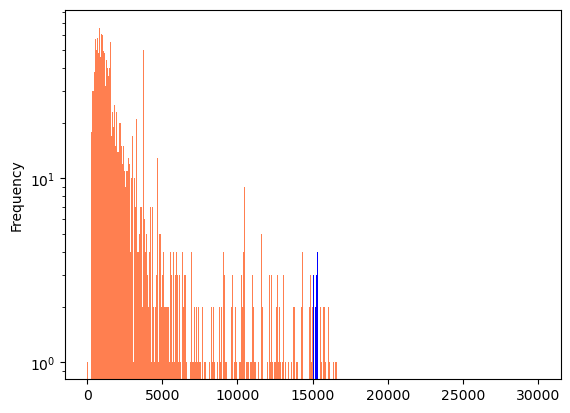

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
trapEmax = dsp_df['trapEmax']
energy_selection = (trapEmax >= 15000) & (trapEmax < 15500)
mask=energy_selection.tolist()
print(len(mask))
# making subplots
trapEmax.plot.hist(grid=False, bins=1000, range=(0, 30000),rwidth=1.,color='coral')
trapEmax[energy_selection].plot.hist(grid=False, bins=1000, range=(0, 30000),rwidth=1.,color='blue')
plt.yscale('log')

In [8]:
# Now construct a WaveformBrowser with this cut
browser = WaveformBrowser(raw_file, 'ch004/raw', aux_values=dsp_df, legend="E = {trapEmax}", entry_mask=energy_selection, n_drawn =5, y_lim=(10000,50000), x_lim=(47000,50000))

Entries: (0, 5)
Entries: (5, 10)


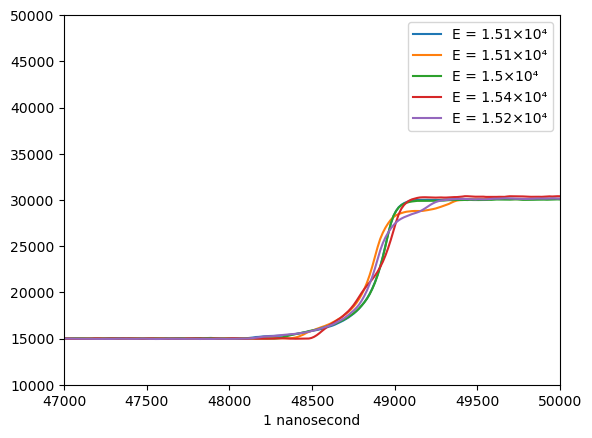

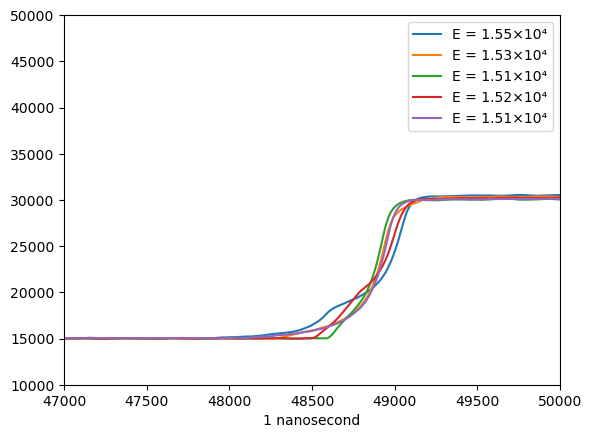

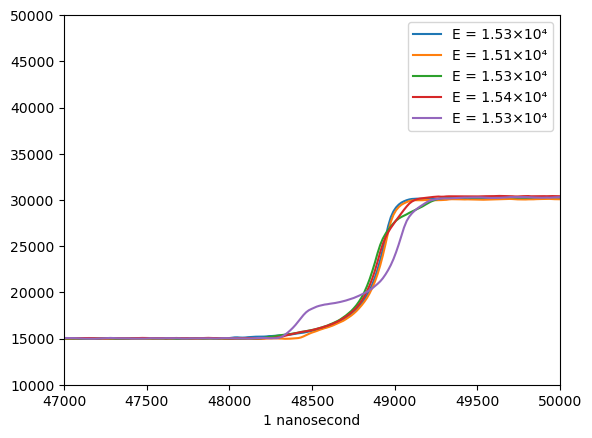

In [9]:
# Draw the next 5 batches of 10 waveforms, and move the legend outside
for entries, i in zip(browser, range(2)):
    print("Entries:", entries)
    browser.new_figure()